# DSCI-100 Project Planning Stage (Individual) -- Gloria Guo

Group: 08

Student number: 17817339

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt




## (1) Data Description:


In [35]:
players_data <- read_csv("https://raw.githubusercontent.com/gloriagxr07-source/dsci-100-2025w1-personal-project/refs/heads/main/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/gloriagxr07-source/dsci-100-2025w1-personal-project/refs/heads/main/sessions.csv")
players_data
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


Players dataset: 196 rows (observations) and 7 columns (variables)

- `experience` [Categorical] the experience level of each player
- `subscribe` [Categorical] whether subscribed to a game-related newsletter
- `hashedEmail` [Categorical] privacy-safe representation of email address
- `played_hours` [Quantitative] the total hours playing the game
- `name` [Categorical] player's name
- `gender` [Categorical] player's gender
- `Age` [Quantitative] player's age

Sessions dataset: 1535 rows (observations) and 5 columns (variables)

- `hashedEmail` [Categorical] privacy-safe representation of email address
- `start_time` [Categorical] formatted datetime when session started
- `end_time` [Categorical] formatted datetime when session ended
- `original_start_time` [Quantitative] start timestamps in milliseconds since January 1, 1970 (UTC)
- `original_end_time` [Quantitative] end timestamps in milliseconds since January 1, 1970 (UTC)

In [36]:
stat_summary_players <- players_data |>
  summarise(across(c(played_hours, Age),
                   list(mean = ~ mean(.x, na.rm = T),
                        sd   = ~ sd(.x, na.rm = T),
                        min  = ~ min(.x, na.rm = T),
                        max  = ~ max(.x, na.rm = T)))) |>
  round(2)

stat_summary_sessions <- sessions_data |>
  summarise(across(c(original_start_time, original_end_time),
                   list(mean = ~ mean(.x, na.rm = T),
                        sd   = ~ sd(.x, na.rm = T),
                        min  = ~ min(.x, na.rm = T),
                        max  = ~ max(.x, na.rm = T)))) |>
  round(2)

stat_summary_players
stat_summary_sessions

played_hours_mean,played_hours_sd,played_hours_min,played_hours_max,Age_mean,Age_sd,Age_min,Age_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,28.36,0,223.1,21.14,7.39,9,58


original_start_time_mean,original_start_time_sd,original_start_time_min,original_start_time_max,original_end_time_mean,original_end_time_sd,original_end_time_min,original_end_time_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,3557491589,1.7124e+12,1.72733e+12,1.719196e+12,3552813134,1.7124e+12,1.72734e+12


Some more specific details (idea from piazza question @988):

In [6]:
summary_players <- summary(players_data) 
summary_sessions <- summary(sessions_data)
experience_level <- unique(players_data$experience)

summary_players
summary_sessions
experience_level

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

## (2) Questions:

Based on the broader question `Question 2`, which aims to find out a group of people with the same characteristics that most likely contribute a large amount of data, I focus on a more specific question -- **can players' total playing hours predict their amount of data contribution?**

My specific question explores the relationship between the total game hours and the contribution of data amounts. To measure the contribution of data amounts, I counted the number of observations provided by each player in sessions dataset and then combined the count column with players dataset. Finally, this table can be used for predictive methods.

In [7]:
sessions_count <- sessions_data |>
    group_by(hashedEmail) |>
    summarize(count = n()) 
sessions_count

hashedEmail,count
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1


In [8]:
players_with_count <- players_data |>
    left_join(sessions_count) |>
    arrange(-count)
players_with_count

Joining with `by = join_by(hashedEmail)`


experience,subscribe,hashedEmail,played_hours,name,gender,Age,count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Amateur,TRUE,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,Dana,Male,23,310
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17,219
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16,159
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,514ebbaa30f0d162127e065ab780892b7930cf8d75944d5eb09c91c02d6026c7,0,Orion,Male,17,NA
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0,Rhys,Male,20,NA
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0,Bailey,Female,17,NA


## (3) Exploratory Data Analysis and Visualization

- `load dataset into R` upload files to a public github repository and read data directly from URL
- `tidy data` already tidy
- `mean value of quantitative variables in players data set`:

In [12]:
mean_quant_players <- players_data |>
    select(played_hours, Age) |>
    map_df(mean, na.rm = T)
mean_quant_players

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918



- `visualization`:

The unscaled plot:

Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


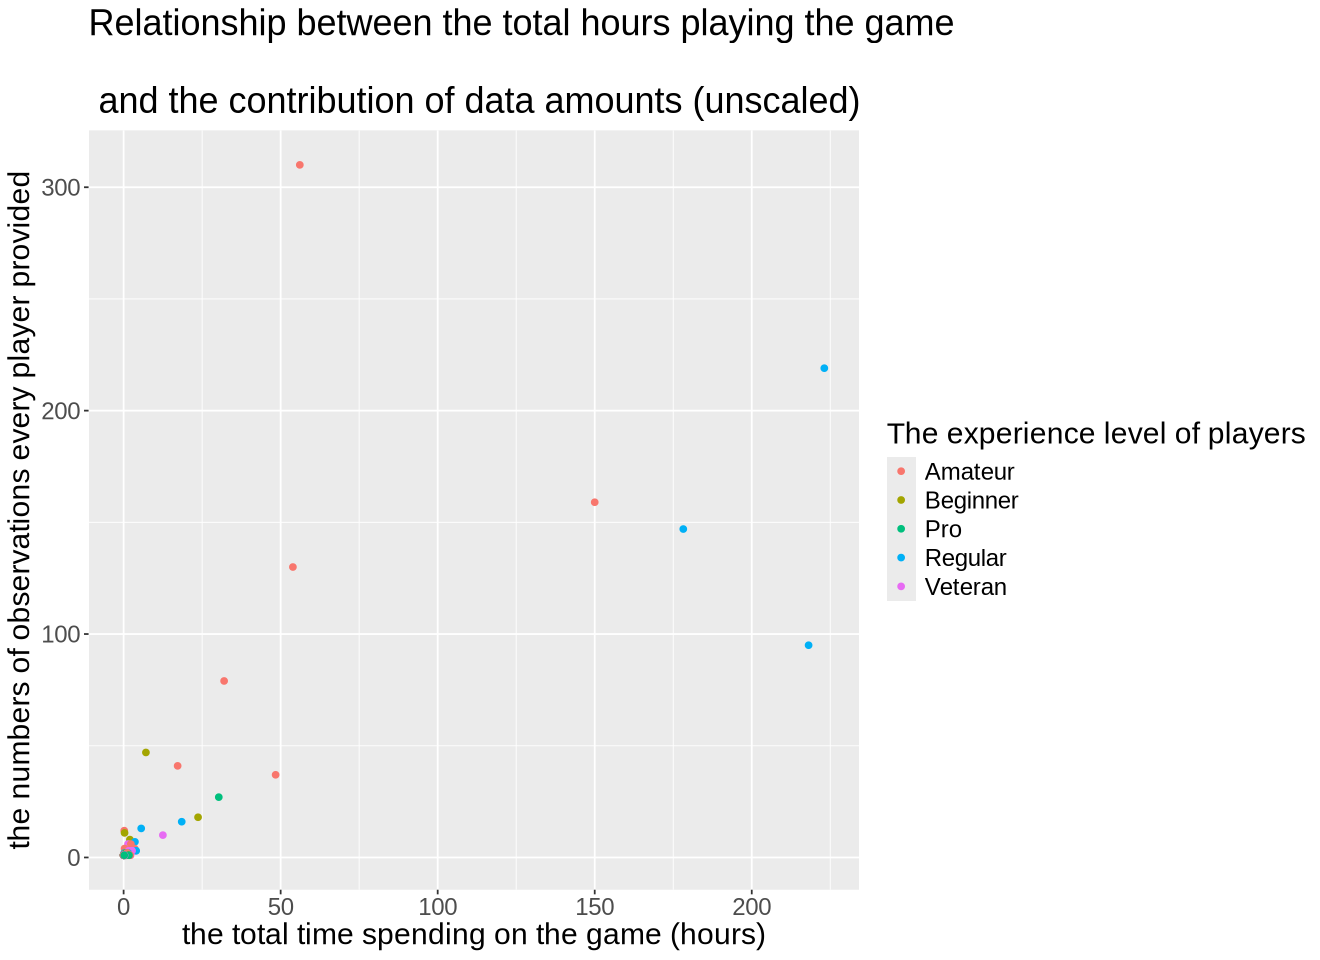

In [33]:
options(repr.plot.width = 11, repr.plot.height = 8)
plot1 <- players_with_count |>
    ggplot(aes(x = played_hours, y = count, color = experience)) +
    geom_point() +
    labs(x = "the total time spending on the game (hours)",
         y = "the number of observations provided by each player",
         color = "The experience level of each player") +
    ggtitle("Relationship between the total hours playing the game 
            \n and the contribution of data amounts (unscaled)") +
    theme(text = element_text(size = 18)) 

plot1

To make the plot clearer and more visible, I used scale_x_log10/scale_y_log10.

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


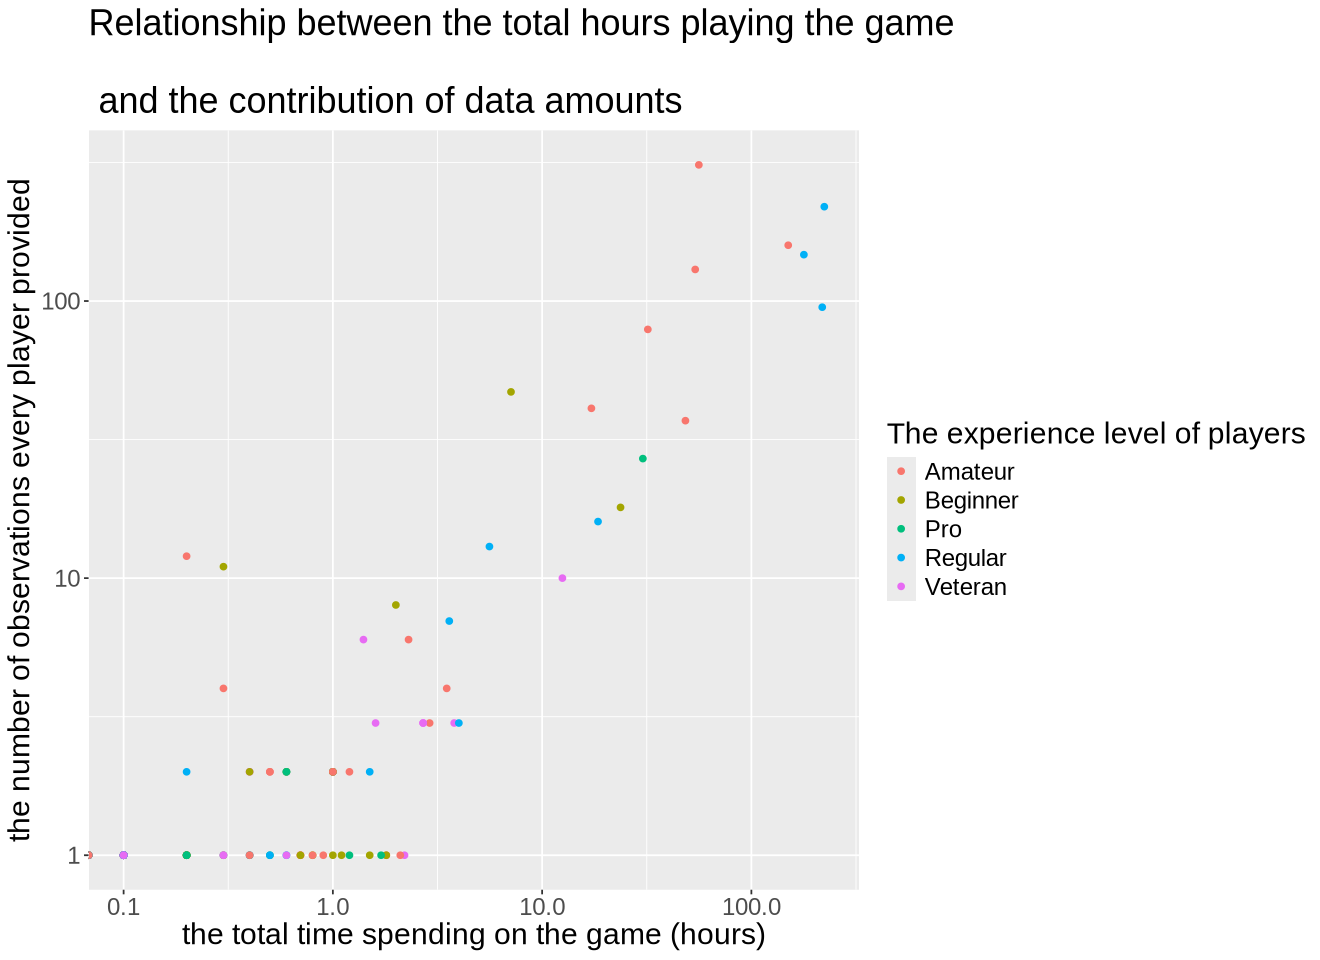

In [32]:
options(repr.plot.width = 11, repr.plot.height = 8)
plot2 <- players_with_count |>
    ggplot(aes(x = played_hours, y = count, color = experience)) +
    geom_point() +
    labs(x = "the total time spending on the game (hours)",
         y = "the number of observations provided by each player",
         color = "The experience level of each player") +
    scale_x_log10() +
    scale_y_log10() +
    ggtitle("Relationship between the total hours playing the game 
            \n and the contribution of data amounts") +
    theme(text = element_text(size = 18)) 

plot2

- This plot shows a positive, linear and modereate relationship between the total hours playing the game and the number of observations that each player provided.
- Some points lie at the bottom of this plot, which violate the trend above.
- Players' experience levels do not affect the distribution of the points.

Also, though not shown in the dataset, longer playing duration might provide more high-quality data. Here, I try to find out the relationship between players' total playing hours and their personal average playing duration. Again, I used scale_x_log10()/scale_y_log10().

Joining with `by = join_by(hashedEmail)`
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


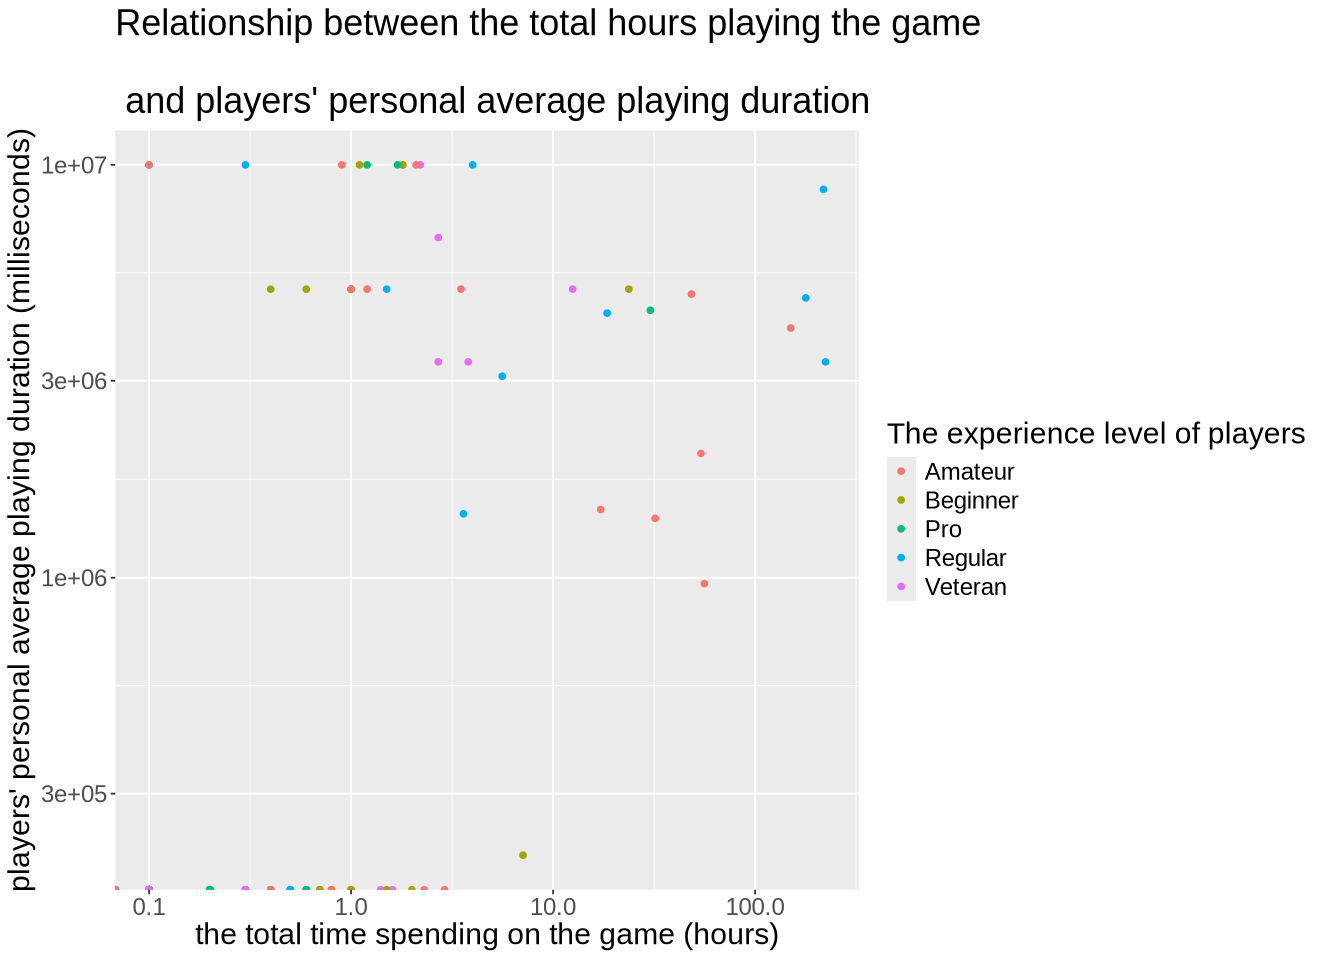

In [39]:
options(repr.plot.width = 11, repr.plot.height = 8)
sessions_duration <- sessions_data |>
    rowwise() |>
    mutate(duration = original_end_time - original_start_time) |>
    group_by(hashedEmail) |>
    summarize(avg_duration = mean(duration, na.rm = T)) 

players_with_avgduration <- players_data |>
    left_join(sessions_duration) |>
    arrange(-avg_duration)

plot3 <- players_with_avgduration |>
    ggplot(aes(x = played_hours, y = avg_duration, color = experience)) +
    geom_point() +
    labs(x = "the total time spending on the game (hours)",
         y = "players' personal average playing duration (milliseconds)",
         color = "The experience level of players") +
    scale_x_log10() +
    scale_y_log10() +
    ggtitle("Relationship between the total hours playing the game 
            \n and players' personal average playing duration") +
    theme(text = element_text(size = 18))

plot3

- This plot does not show a relationship between the total game hours and personal average session duration.
- Players' experience levels do not appear to affect the distribution of this relationship.

Therefore, the large amount of data provided by players who spent longer total playing hours might not be more informative than that of the players with shorter playing hours.
This result is not surprising as total game time and average session duration can be independent and different based on people's personal habits.


## (4) Methods and Plan

- As shown in plot2, players with longer total playing hours are more likely to contribute a large amount of data, so this linear relationship can be used for prediction.

- Assumption: a linear relationship

- I will use total playing hours to predict the amount of data contribution (measured as the number of observations provided by each player). Since the response variable is quantitative and the relationship appears linear, linear regression will be an appropriate method. 

- Steps:

First, split the data into two parts -- 70% for training and 30% for testing. Then, create a recipe and a model and fit them to the training data to predict the test data set. Cross validation will not be used. If the precision and recall are appropriate, we can finally apply the model to predict the amount of data contribution.

- The reason why K-nearest neighbors regression can not be used here is because most points gather in the bottom left of plot1, which affects the prediction result in the top right corner.
  
- Although linear regression is useful here, it has some limitations. For example, when encountering nonlinear patterns, this method might not work.


## (5) GitHub Repository

https://github.com/gloriagxr07-source/dsci-100-2025w1-personal-project.git